Example of the process of doing DEMs for all orbits for a given observation of an AR – where we don't window out any intervals because of shifts, etc. Instead, we will save energy-specific information about the percent of NuSTAR emission in the chosen region as a function of time, for later inspection. This will help identify cases where pointing shifts might cause unphysical distortion to the DEM inputs. 

Note: auto-download of an AIA file (for use in the initial co-alignmnet) will break while the JSOC is still down. We will add a thing where you can point to an existing AIA file instead.

Overview:

- Define orbits
- Run time interval selection
- Examine resulting intervals
- Manually establish a co-alignment shift between NuSTAR and AIA
- Automatically find co-alignment shifts + make regions for all other time intervals (note: this relies on the assumption that the COM is a good representation of the location of the brightest source, i.e. that the NuSTAR data is primarially one blob).
- Save AIA region files for NCCS input
- NOT IN THIS NOTEBOOK: YOU THEN TAKE THOSE AND MAKE AIA INPUTS ON THE NCCS
- Conduct AIA/NuSTAR DEMs as a function of time, given all the above
- Plot results.
- Print some stats about "left out" times.

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import glob
# from astropy.io import fits
# from astropy import units as u
# import importlib
# import pathlib

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

# #import nustar_dem_prep as nu
import initial_analysis as ia
import orbit_auto as oa
import time_interval_selection as tis
import nustar_utilities as nuutil
import gauss2D as g2d


# import os
# # For macOS
# def play_sound():
#     os.system("afplay /System/Library/Sounds/Glass.aiff")

import pickle
import pathlib
import importlib
from astropy import units as u
import numpy as np


In [2]:
key = '01-sep-15'
#method = 'fit'
#method = 'double'
method = 'input'

In [3]:
with open('all_targets.pickle', 'rb') as f:
    data = pickle.load(f)

ARDict = data[key]

id_dirs = ARDict['datapaths']
obsids = ARDict['obsids']
working_dir = ARDict['working_dir']


In [4]:
importlib.reload(ia)
obsids=[]
for id in id_dirs:
    evt_data, hdr, obsid = ia.return_submap(datapath=id, fpm='A', return_evt_hdr=True, return_obsid=True)
    obsids.append(obsid)
    time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]
    timerange = [time0, time1]
    print(timerange[0].strftime('%H-%M-%S'), timerange[1].strftime('%H-%M-%S'))
    

03-54-43 04-47-44
08-38-16 09-37-58
10-15-01 11-14-43


In [5]:
importlib.reload(oa)
aia_dir = '/Users/jmdunca2/sample_aia/sample_aia/'


aiamaps = oa.get_orbit_aiamaps(aia_dir, id_dirs, wave=94)   

/Users/jmdunca2/nustar/sep-2015/20102002001/
2015-09-01 03:54:43
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2015-09-01T035400.13Z.image_lev1.fits']
/Users/jmdunca2/nustar/sep-2015/20102003001/
2015-09-01 08:38:16
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2015-09-01T083805.62Z.image_lev1.fits']
/Users/jmdunca2/nustar/sep-2015/20102004001/
2015-09-01 10:15:01
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2015-09-01T101500.12Z.image_lev1.fits']


Goal: write a combined fundtion that, for any number of regions found via any method, plots nustar contours over aia data with all regions shown. 
- In the case of multiple regions (and therefore, multiple different sets of time intervals per orbit), choose the longest time interval for the NuSTAR data.
- In the case where some of the orbits failed TIS for some regions, account for this (only plot sucessful-TIS regions). 

cp: /Users/jmdunca2/do-dem/initial_dem_1sep15/region_1/10-15-05_10-35-05/10-15-05_10-35-05_aia_region.pickle and /Users/jmdunca2/do-dem/initial_dem_1sep15/region_1/10-15-05_10-35-05/10-15-05_10-35-05_aia_region.pickle are identical (not copied).


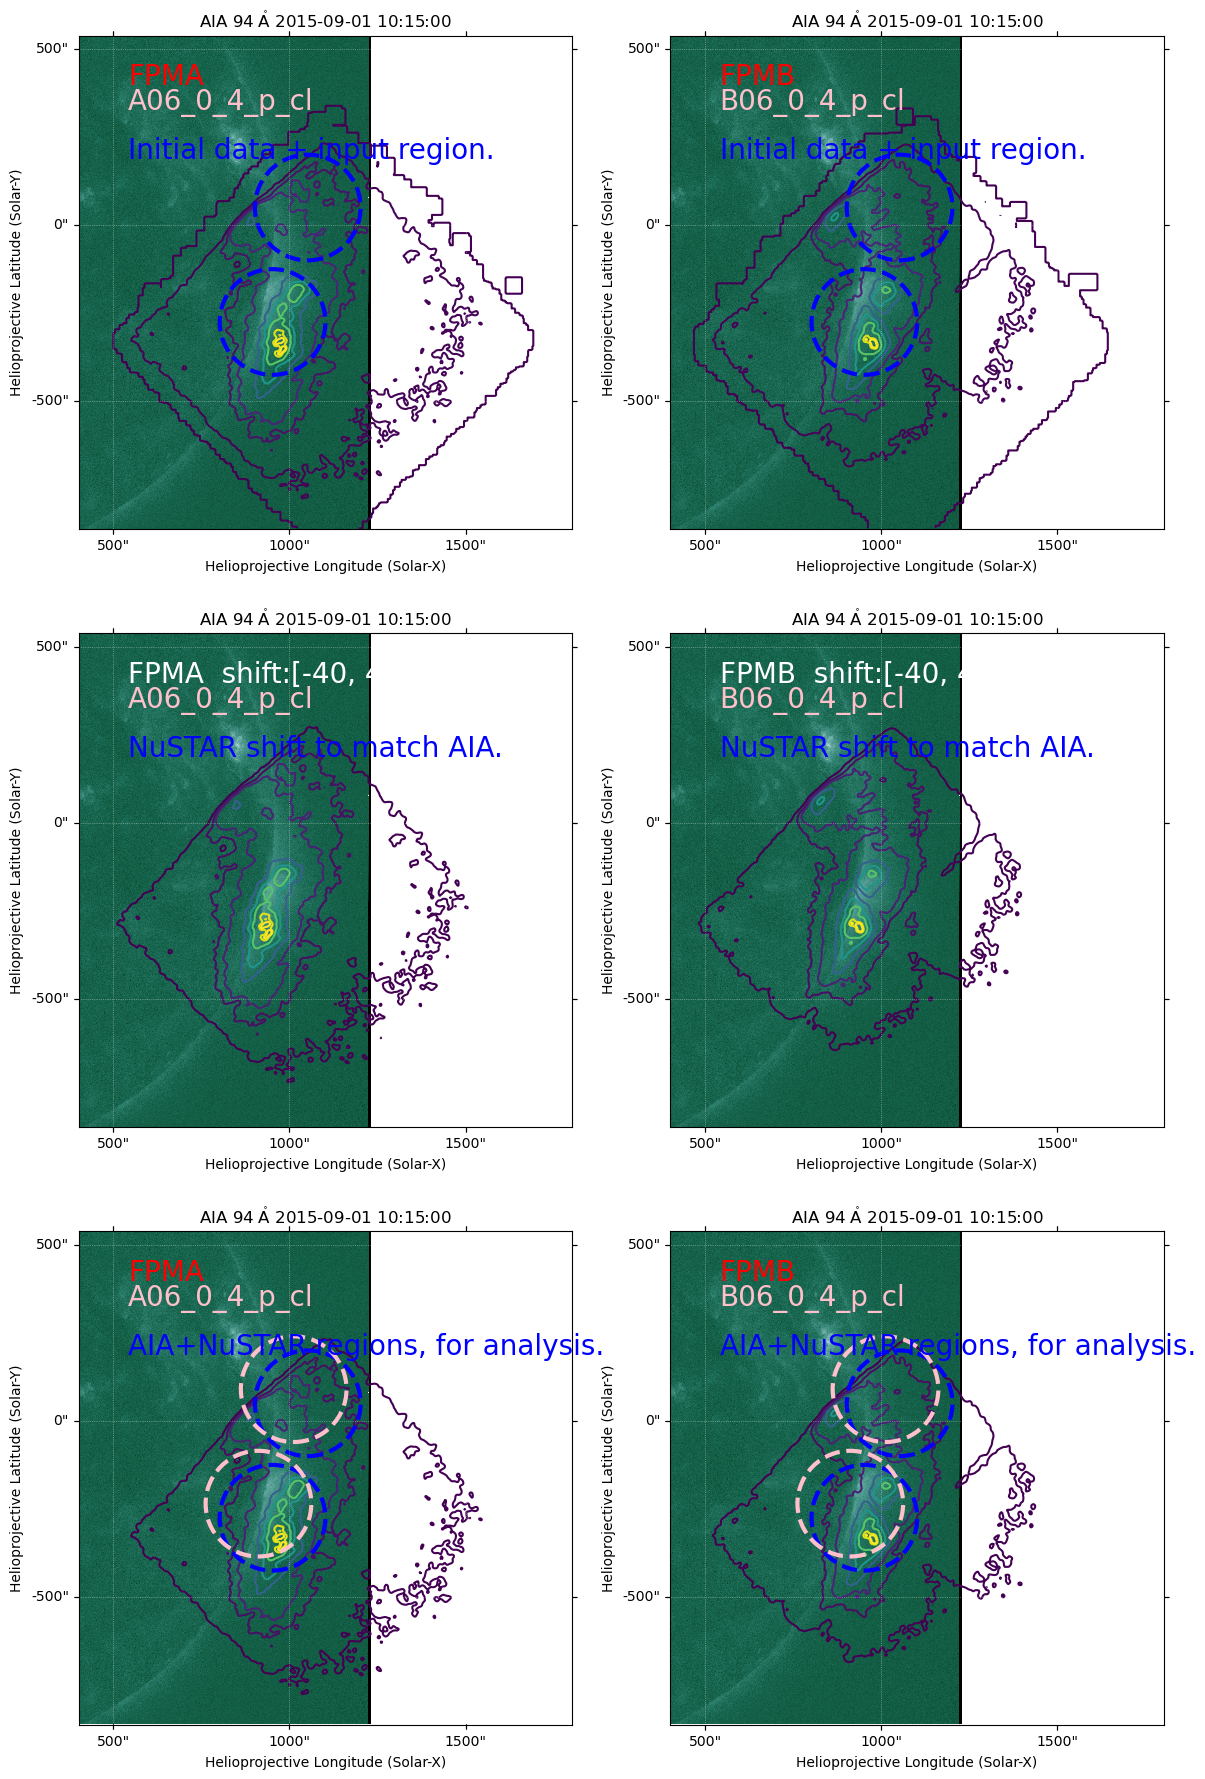

In [8]:
importlib.reload(oa)
oa.per_orbit_region_adjustment(working_dir, id_dirs, obsids, 2, aiamaps, nushift=[-40,40], method=method, shush=True)

In [32]:
importlib.reload(oa)

for r in region_dirs:
    all_time_intervals, all_time_intervals_list = oa.find_all_intervals(r)
    suborbit_dirs = oa.make_all_aia_dicts(all_time_intervals[1:], r, key)
print('')
print(set(suborbit_dirs))

0 - 0 01-28-30 01-35-55
0 - 1 01-35-55 01-38-30
0 - 2 01-38-30 01-40-15
0 - 3 01-40-15 01-41-15
0 - 4 01-41-15 01-43-45
0 - 5 01-43-45 01-46-00
0 - 6 01-46-00 01-49-00
0 - 7 01-49-00 01-50-45
0 - 8 01-50-45 01-51-50
0 - 9 01-51-50 01-53-00
0 - 10 01-53-00 01-53-30
0 - 11 01-53-30 01-54-00
0 - 12 01-54-00 01-54-30
0 - 13 01-54-30 01-55-00
0 - 14 01-55-00 01-55-30
0 - 15 01-55-30 01-56-00
0 - 16 01-56-00 01-56-30
0 - 17 01-56-30 01-57-00
0 - 18 01-57-00 01-57-30
0 - 19 01-57-30 01-58-00
0 - 20 01-58-00 01-58-30
0 - 21 01-58-30 01-59-00
0 - 22 01-59-00 01-59-30
0 - 23 01-59-30 02-00-00
0 - 24 02-00-00 02-00-30
0 - 25 02-00-30 02-01-00
0 - 26 02-01-00 02-01-30
0 - 27 02-01-30 02-02-00
0 - 28 02-02-00 02-02-30
0 - 29 02-02-30 02-03-45
0 - 30 02-03-45 02-04-15
0 - 31 02-04-15 02-10-25

1 - 0 03-21-15 04-04-45

2 - 0 04-41-50 05-09-15
2 - 1 05-09-15 05-41-25

{'region0': {'radius': 150.0, 'centerx': <Quantity 1039.97977956 arcsec>, 'centery': <Quantity 50.00218364 arcsec>, 'time_interval': <T

In [29]:
dict_={}
dict_['hi'+str(0)]='hey'
dict_

{'hi0': 'hey'}

In [ ]:
# importlib.reload(oa)
# lead_intervals=[]
# for at in all_time_intervals:
#     lead_intervals.append(at[0])

# reference_interval=time_interval


# oa.coalign_based_on_prior(lead_intervals, working_dir, reference_interval, input_aias=aiamaps)

In [ ]:
# importlib.reload(oa)
# import pickle

# orbit_ind=0

# time_interval = all_time_intervals[orbit_ind][0]
# nushift=[0, 0]

# #(first run)
# dict = oa.nu_aia_coalign(time_interval, working_dir, nushift, save_dict=True, input_aia=aiamaps[orbit_ind])

# time=time_interval
# timestring = time[0].strftime('%H-%M-%S')
# stopstring = time[1].strftime('%H-%M-%S')
# timestring=timestring+'_'+stopstring
# file=working_dir+timestring+'/'+timestring+'_aia_region.pickle'
# try:
#     with open(file, 'rb') as f:
#         data = pickle.load(f)
#     dict = oa.nu_aia_coalign(time_interval, working_dir, nushift, save_dict=True, input_aia = data['map'])
# except FileNotFoundError: 
#     print('what')


In [ ]:
# #IF YOU WANT TO REVISE THE STARTING SHIFT SOMEWHERE OTHER THAN JUST AT THE VERY FIRST ORBIT - NEXT 2 CELLS

# importlib.reload(oa)
# import pickle

# orbit_ind=3

# time_interval = all_time_intervals[orbit_ind][0]
# nushift=[30, -40]

# #(first run)
# dict = oa.nu_aia_coalign(time_interval, working_dir, nushift, save_dict=True, input_aia=aiamaps[orbit_ind])

# time=time_interval
# timestring = time[0].strftime('%H-%M-%S')
# stopstring = time[1].strftime('%H-%M-%S')
# timestring=timestring+'_'+stopstring
# file=working_dir+timestring+'/'+timestring+'_aia_region.pickle'
# try:
#     with open(file, 'rb') as f:
#         data = pickle.load(f)
#     dict = oa.nu_aia_coalign(time_interval, working_dir, nushift, save_dict=True, input_aia = data['map'])
# except FileNotFoundError: 
#     print('what')


In [ ]:
# importlib.reload(oa)
# lead_intervals=[]
# for at in all_time_intervals[3:]:
#     lead_intervals.append(at[0])

# reference_interval=time_interval

# oa.coalign_based_on_prior(lead_intervals, working_dir, reference_interval, input_aias=aiamaps)

In [ ]:
importlib.reload(oa)
suborbit_dirs = oa.make_all_aia_dicts(all_time_intervals, working_dir, key)
print(set(suborbit_dirs))

In [ ]:
# import glob

# #Set path to obsid directory - initial pipeline should have been run already.
# ind=0
# datapath=id_dirs[ind]
# obsid=obsids[ind]

# evt_data, hdr = ia.return_submap(datapath=datapath, fpm='A', return_evt_hdr=True)
# time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]
# timerange = [time0.tt.datetime, time1.tt.datetime]
# from datetime import timezone
# timerange = [t.replace(tzinfo=timezone.utc) for t in timerange]

# #Comment second line if you're not using this same example nustar orbit
# #Edit it to include only the desired time interval (default- all times in file) once you've run this once
# #timerange=[]
# #timerange=[datetime.datetime(2018, 5, 29, 22, 22), datetime.datetime(2018, 5, 29, 23, 20)]

# evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
# evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
# hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
# hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')

# import lightcurves as lc

# importlib.reload(lc)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], 
#                               livetime_corr=False, save_dir=working_dir)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.], 
#                               livetime_corr=False, save_dir=working_dir)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.], 
#                               livetime_corr=False, save_dir=working_dir)

# lc.plot_nustar_lightcurves(eranges = [[2.,4.],[4.,6.],[6.,10.]],
#                            timerange=timerange, save_dir=working_dir)